In [ ]:
import requests
import pandas as pd

r = requests.get(
    "https://www.vivino.com/api/explore/explore",
    params = {
        "country_code": "FR",
        "country_codes[]":"fr",
        "currency_code":"EUR",
        "grape_filter":"varietal",
        "min_rating":"1",
        "order_by":"price",
        "order":"desc",
        "page": 1,
        "price_range_max":"500",
        "price_range_min":"0",
        "wine_type_ids[]":"1"
    },
    headers= {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0"
    }
)
results = [
    (
        t["vintage"]["wine"]["winery"]["name"], 
        f'{t["vintage"]["wine"]["name"]} {t["vintage"]["year"]}',
        t["vintage"]["year"],
        t["vintage"]["statistics"]["ratings_average"],
        t["vintage"]["statistics"]["ratings_count"],
        t["vintage"]["wine"]["region"]["seo_name"],
        t["price"]["amount"]
    )
    for t in r.json()["explore_vintage"]["matches"]
]
dataframe = pd.DataFrame(results,columns=['Winery','Wine','vintage','Rating','num_review','region','price'])

print(dataframe)

                                  Winery  \
0            Domaine de La Romanée-Conti   
1                          Domaine Leroy   
2                           Maison Leroy   
3                          Domaine Leroy   
4                          Domaine Leroy   
5                         Château Le Gay   
6            Domaine de La Romanée-Conti   
7                          Domaine Leroy   
8                          Domaine Leroy   
9                         Château Pétrus   
10                          Maison Leroy   
11           Domaine de La Romanée-Conti   
12           Domaine de La Romanée-Conti   
13               Domaine Cecile Tremblay   
14                    Domaine René Engel   
15                        Château Pétrus   
16                    Domaine René Engel   
17                        Château Pétrus   
18                    Domaine G. Roumier   
19           Domaine de La Romanée-Conti   
20                         Domaine Leroy   
21                        Châtea

In [ ]:
import json
print(json.dumps(r.json()["explore_vintage"]["matches"][0], indent=2))

{
  "vintage": {
    "id": 171683624,
    "seo_name": "leplan-vermeersch-gt-carignan-2020",
    "name": "LePlan-Vermeersch GT-Carignan 2020",
    "statistics": {
      "status": "Normal",
      "ratings_count": 669,
      "ratings_average": 3.9,
      "labels_count": 60,
      "wine_ratings_count": 669,
      "wine_ratings_average": 3.9,
      "wine_status": ""
    },
    "image": {
      "location": "//images.vivino.com/thumbs/uolLzcb4QHO-C1Ia1UHDiA_pl_480x640.png",
      "variations": {
        "bottle_large": "//images.vivino.com/thumbs/uolLzcb4QHO-C1Ia1UHDiA_pb_x960.png",
        "bottle_medium": "//images.vivino.com/thumbs/uolLzcb4QHO-C1Ia1UHDiA_pb_x600.png",
        "bottle_medium_square": "//images.vivino.com/thumbs/uolLzcb4QHO-C1Ia1UHDiA_pb_600x600.png",
        "bottle_small": "//images.vivino.com/thumbs/uolLzcb4QHO-C1Ia1UHDiA_pb_x300.png",
        "bottle_small_square": "//images.vivino.com/thumbs/uolLzcb4QHO-C1Ia1UHDiA_pb_300x300.png",
        "label": "//images.vivino.com/t

In [ ]:
import requests
import pandas as pd
import math
import time

HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0",
    "Accept": "application/json"
}

BASE_PARAMS = {
    "country_code": "FR",
    "country_codes[]": "fr",
    "currency_code": "EUR",
    "grape_filter": "varietal",
    "min_rating": "1",
    "order_by": "price",
    "order": "asc",
    "price_range_min": "0",
    "price_range_max": "500",
    "wine_type_ids[]": "1"
}

def scrape_all_vivino_pages():
    url = "https://www.vivino.com/api/explore/explore"
    all_results = []

    # Step 1: Request page 1 to find out total number of pages
    params = BASE_PARAMS.copy()
    params["page"] = 1

    response = requests.get(url, headers=HEADERS, params=params)
    if response.status_code != 200:
        raise Exception(f"Initial request failed with status code {response.status_code}")

    data = response.json()
    total_wines = data["explore_vintage"]["records_matched"]
    wines_per_page = len(data["explore_vintage"]["matches"])
    total_pages = math.ceil(total_wines / wines_per_page)

    print(f"🔍 Found {total_wines} wines across {total_pages} pages.")

    # Step 2: Loop through all pages
    for page in range(1, total_pages + 1):
        print(f"📄 Scraping page {page}/{total_pages}")
        params["page"] = page
        response = requests.get(url, headers=HEADERS, params=params)

        if response.status_code != 200:
            print(f"⚠️ Skipping page {page} due to error {response.status_code}")
            continue

        matches = response.json()["explore_vintage"]["matches"]
        for t in matches:
            try:
                all_results.append((
                    t["vintage"]["wine"]["winery"]["name"],
                    f'{t["vintage"]["wine"]["name"]} {t["vintage"]["year"]}',
                    t["vintage"]["year"],
                    t["vintage"]["statistics"]["ratings_average"],
                    t["vintage"]["statistics"]["ratings_count"],
                    t["vintage"]["wine"]["region"]["seo_name"],
                    t["price"]["amount"]
                ))
            except Exception as e:
                print("❌ Skipping a wine due to missing data:", e)

        time.sleep(0.5)  # Be polite to the server

    return pd.DataFrame(all_results, columns=[
        'Winery', 'Wine', 'vintage', 'Rating', 'num_review', 'region', 'price'
    ])

# Run the scraper
df = scrape_all_vivino_pages()

# Save or inspect
print(df.head())
# df.to_csv("vivino_french_wines.csv", index=False)


🔍 Found 44627 wines across 1860 pages.
📄 Scraping page 1/1860
📄 Scraping page 2/1860
📄 Scraping page 3/1860
📄 Scraping page 4/1860
📄 Scraping page 5/1860
📄 Scraping page 6/1860
📄 Scraping page 7/1860
📄 Scraping page 8/1860
📄 Scraping page 9/1860
📄 Scraping page 10/1860
📄 Scraping page 11/1860
📄 Scraping page 12/1860
📄 Scraping page 13/1860
📄 Scraping page 14/1860
📄 Scraping page 15/1860
📄 Scraping page 16/1860
📄 Scraping page 17/1860
📄 Scraping page 18/1860
📄 Scraping page 19/1860
📄 Scraping page 20/1860
📄 Scraping page 21/1860
📄 Scraping page 22/1860
📄 Scraping page 23/1860
📄 Scraping page 24/1860
📄 Scraping page 25/1860
📄 Scraping page 26/1860
📄 Scraping page 27/1860
📄 Scraping page 28/1860
📄 Scraping page 29/1860
📄 Scraping page 30/1860
📄 Scraping page 31/1860
📄 Scraping page 32/1860
📄 Scraping page 33/1860
📄 Scraping page 34/1860
📄 Scraping page 35/1860
📄 Scraping page 36/1860
📄 Scraping page 37/1860
📄 Scraping page 38/1860
📄 Scraping page 39/1860
📄 Scraping page 40/1860
📄 Scraping

In [ ]:
print(df)

                            Winery                              Wine  vintage  \
0             Les Hauts de Palette   Chateau du Barail Bordeaux 2023     2023   
1              Château de Lavagnac                     Bordeaux 2015     2015   
2                Château de Callac                 Graves Rouge 2011     2011   
3           Château Lacoste Garzac                     Bordeaux 2022     2022   
4      Château La Fleur Saint-Jean                     Bordeaux 2009     2009   
...                            ...                               ...      ...   
44635                    Le Cartel  Alicante - Henri - Bouschet 2022     2022   
44636           Mas des Auribelles                      Pézenas 2019     2019   
44637          Domaine de la Garde  Tradition Coteaux du Quercy 2018     2018   
44638        Château Tour de Rieux          Demi Muid Minervois 2021     2021   
44639         Domaine Elodie Balme                      Rasteau 2023     2023   

       Rating  num_review  

In [ ]:
vintage_counts = df["vintage"].value_counts().sort_index()
print(vintage_counts)

vintage
1985        1
1987        1
2006        2
2008        2
2009        1
2010        2
2011        8
2012        7
2013       13
2014     1803
2015       31
2016       51
2017      922
2018     5436
2019     3704
2020    10041
2021     9119
2022    11194
2023     2242
2024       60
Name: count, dtype: int64


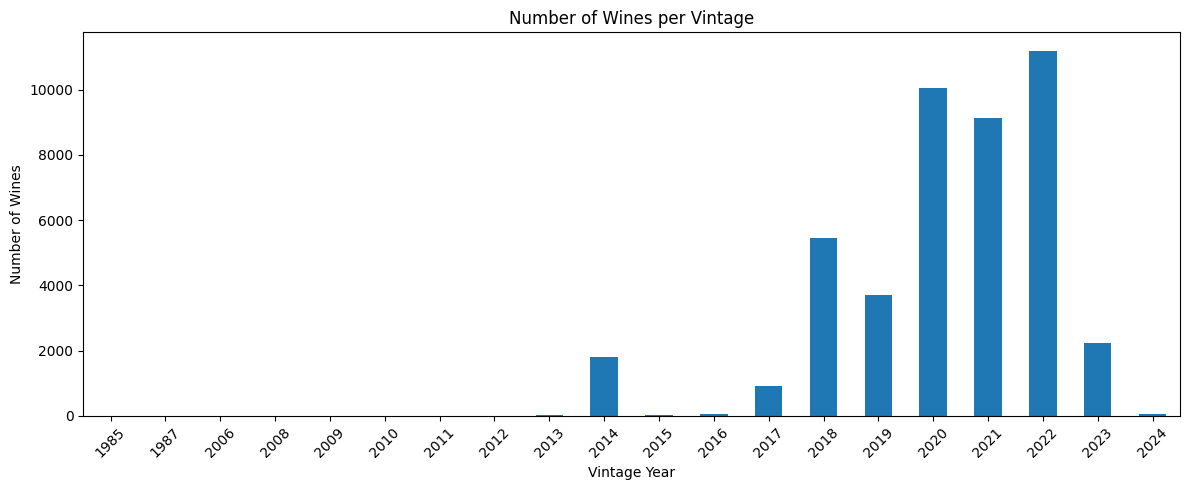

In [ ]:
import matplotlib.pyplot as plt

vintage_counts.plot(kind='bar', figsize=(12, 5))
plt.title("Number of Wines per Vintage")
plt.xlabel("Vintage Year")
plt.ylabel("Number of Wines")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df.to_csv("vivino_french_wines.csv", index=False)

In [35]:
df.shape
df_c = df.drop_duplicates()
df_c.shape

(2022, 7)

In [31]:
import requests
import pandas as pd
import math
import time

HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0",
    "Accept": "application/json"
}

BASE_PARAMS = {
    "country_code": "FR",
    "country_codes[]": "fr",
    "currency_code": "EUR",
    "grape_filter": "varietal",
    "min_rating": "1",
    "order_by": "price",
    "order": "asc",
    "wine_type_ids[]": "1"
}

PRICE_WINDOWS = [
    (0, 500),
    (15, 500),
    (30, 500),
    (50, 1000),
    (100, 1000),
    (500, 50000)
]

def scrape_price_window(min_price, max_price):
    url = "https://www.vivino.com/api/explore/explore"
    results = []

    # First, get the total number of pages for this price window
    params = BASE_PARAMS.copy()
    params.update({
        "price_range_min": min_price,
        "price_range_max": max_price,
        "page": 1
    })

    response = requests.get(url, headers=HEADERS, params=params)
    if response.status_code != 200:
        print(f"❌ Failed to get page count for {min_price}–{max_price}")
        return results

    data = response.json()
    total_wines = data.get("explore_vintage", {}).get("records_matched", 0)
    wines_per_page = len(data.get("explore_vintage", {}).get("matches", []))
    if wines_per_page == 0:
        print(f"⛔ No wines found for price range {min_price}–{max_price}")
        return results

    total_pages = math.ceil(total_wines / wines_per_page)
    print(f"🔢 Price range {min_price}–{max_price}€: {total_wines} wines over {total_pages} pages.")

    # Scrape all pages in the price range
    for page in range(1, total_pages + 1):
        print(f"📄 Scraping page {page}/{total_pages} in {min_price}–{max_price}€")
        params["page"] = page
        response = requests.get(url, headers=HEADERS, params=params)

        if response.status_code != 200:
            print(f"⚠️ Error on page {page} for {min_price}–{max_price}: {response.status_code}")
            break

        matches = response.json().get("explore_vintage", {}).get("matches", [])
        if not matches:
            break

        for t in matches:
            try:
                results.append((
                    t["vintage"]["wine"]["winery"]["name"],
                    f'{t["vintage"]["wine"]["name"]} {t["vintage"]["year"]}',
                    t["vintage"]["year"],
                    t["vintage"]["statistics"]["ratings_average"],
                    t["vintage"]["statistics"]["ratings_count"],
                    t["vintage"]["wine"]["region"]["seo_name"],
                    t["price"]["amount"]
                ))
            except Exception as e:
                print("❌ Skipping a wine due to missing data:", e)

        time.sleep(0.5)

    return results

def scrape_all_vivino_price_windows():
    all_results = []

    for min_price, max_price in PRICE_WINDOWS:
        wines_in_window = scrape_price_window(min_price, max_price)
        all_results.extend(wines_in_window)

    df_full = pd.DataFrame(all_results, columns=[
        'Winery', 'Wine', 'vintage', 'Rating', 'num_review', 'region', 'price'
    ])

    return df_full

# Run and get the dataset
dft = scrape_all_vivino_price_windows()

# Save or preview
print(dft.head())
# df.to_csv("vivino_french_wines_full.csv", index=False)


🔢 Price range 0–500€: 44616 wines over 1859 pages.
📄 Scraping page 1/1859 in 0–500€
📄 Scraping page 2/1859 in 0–500€
📄 Scraping page 3/1859 in 0–500€
📄 Scraping page 4/1859 in 0–500€
📄 Scraping page 5/1859 in 0–500€
📄 Scraping page 6/1859 in 0–500€
📄 Scraping page 7/1859 in 0–500€
📄 Scraping page 8/1859 in 0–500€
📄 Scraping page 9/1859 in 0–500€
📄 Scraping page 10/1859 in 0–500€
📄 Scraping page 11/1859 in 0–500€
📄 Scraping page 12/1859 in 0–500€
📄 Scraping page 13/1859 in 0–500€
📄 Scraping page 14/1859 in 0–500€
📄 Scraping page 15/1859 in 0–500€
📄 Scraping page 16/1859 in 0–500€
📄 Scraping page 17/1859 in 0–500€
📄 Scraping page 18/1859 in 0–500€
📄 Scraping page 19/1859 in 0–500€
📄 Scraping page 20/1859 in 0–500€
📄 Scraping page 21/1859 in 0–500€
📄 Scraping page 22/1859 in 0–500€
📄 Scraping page 23/1859 in 0–500€
📄 Scraping page 24/1859 in 0–500€
📄 Scraping page 25/1859 in 0–500€
📄 Scraping page 26/1859 in 0–500€
📄 Scraping page 27/1859 in 0–500€
📄 Scraping page 28/1859 in 0–500€
📄 Scra

In [40]:
dft.size

df_cleaned = dft.drop_duplicates()


In [38]:
df_cleaned.size
df_cleaned.shape

(11966, 7)

In [36]:
df_cleaned.to_csv("vivino_french_wines_full.csv", index=False)

In [41]:
print(df_cleaned)

                              Winery  \
0               Les Hauts de Palette   
1                Château de Lavagnac   
2                  Château de Callac   
3             Château Lacoste Garzac   
4       Château Elixir de Gravaillac   
...                              ...   
145992                      Dugat-Py   
145993                     Mommessin   
146007   Domaine de La Romanée-Conti   
146008       Domaine Armand Rousseau   
146009          Domaine Denis Mortet   

                                                     Wine vintage  Rating  \
0                         Chateau du Barail Bordeaux 2023    2023     3.3   
1                                           Bordeaux 2015    2015     3.6   
2                                       Graves Rouge 2011    2011     3.6   
3                                           Bordeaux 2022    2022     3.4   
4                                     Bordeaux Rouge 2015    2015     3.2   
...                                                   ...